In [42]:
import mysql.connector
import pandas as pd
import koreanize_matplotlib
import re

In [43]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from tqdm import tqdm
import ipywidgets as widgets
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import re
from selenium.webdriver.support.ui import Select
import pandas as pd
import numpy as np

In [164]:
# aws key && pwd -> connection

In [136]:
cur.execute("show tables")
result = cur.fetchall()
raw_data = pd.DataFrame(result)
raw_data

,0
0,media
1,movie
2,ott
3,performance
4,screen


In [137]:
table_list = raw_data[0].tolist()
table_list

['media', 'movie', 'ott', 'performance', 'screen']

In [138]:
cur.execute("select * from media")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
media = pd.DataFrame(result, columns=columns)
media.head()

,index,id,type,year,sale
0,0,1111,출판,2018,20.9
1,1,1112,만화,2018,1.2
2,2,1113,음악,2018,6.1
3,3,1114,게임,2018,14.3
4,4,1115,영화,2018,5.9


In [139]:
cur.execute("select * from ott")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
ott = pd.DataFrame(result, columns=columns)
ott.head()

,index,id,name,year,sale,take
0,0,2221,netflix,2019,1859.0,22
1,1,2222,wave,2019,973.0,-137
2,2,2223,watcha,2019,217.0,-92
3,3,2224,Google korea,2019,2124.0,102
4,4,2225,netflix,2020,4154.0,88


In [140]:
cur.execute("select * from performance")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
performance = pd.DataFrame(result, columns=columns)
performance.head()

,index,id,year,sale
0,0,4441,2020,236320.200
1,1,4442,2021,391433.300
2,2,4443,2022,996243.800
3,3,4444,2023,1310570.868


In [141]:
cur.execute("select * from screen")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
screen = pd.DataFrame(result, columns=columns)
screen.head()

,index,id,name,Year,screen_type,screening,sale,audience
0,0,3331,명량,2014,필름,5,133000,17
1,1,3332,명량,2014,디지털,187193,135269836010,17552919
2,2,3333,명량,2014,디지털 영문자막,85,40515300,5068
3,3,3334,명량,2014,4D,1379,428484000,52742
4,4,3335,명량,2014,디지털 가치봄,68,23547000,5625


In [142]:
screen[-30:]

,index,id,name,Year,screen_type,screening,sale,audience
1650,1650,3331651,플래시,2023,IMAX,973,856445500,47012
1651,1651,3331652,플래시,2023,ScreenX,1703,339388000,26707
1652,1652,3331653,플래시,2023,DOLBYCINEMA,159,103639030,6975
1653,1653,3331654,바비,2023,디지털,27421,5700421563,581778
1654,1654,3331655,바비,2023,4D,198,7684000,888
1655,1655,3331656,바비,2023,DOLBYCINEMA,114,52242680,3705
1656,1656,3331657,신차원! 짱구는 못말려 더 무비 초능력 대결전 ~날아라 수제김밥~,2023,디지털,18773,4621562400,444866
1657,1657,3331658,신차원! 짱구는 못말려 더 무비 초능력 대결전 ~날아라 수제김밥~,2023,디지털 한글자막 CC,30,10429300,1075
1658,1658,3331659,신차원! 짱구는 못말려 더 무비 초능력 대결전 ~날아라 수제김밥~,2023,디지털 더빙,21349,4510540536,499516
1659,1659,3331660,"귀멸의 칼날: 상현집결, 그리고 도공 마을로",2023,디지털,16961,4096639900,367732


In [143]:
screen.groupby('screen_type').count()

,index,id,name,Year,screening,sale,audience
screen_type,,,,,,,
3D HFR,1,1,1,1,1,1,1
3D 더빙,34,34,34,34,34,34,34
3D 디지털,105,105,105,105,105,105,105
4D,232,232,232,232,232,232,232
4D 더빙,36,36,36,36,36,36,36
4DX 영어자막,1,1,1,1,1,1,1
DOLBYCINEMA,85,85,85,85,85,85,85
DOLBYCINEMA 3D,11,11,11,11,11,11,11
DOLBYCINEMA 더빙,1,1,1,1,1,1,1


3d
4d
large screen
ls 3d
digital
ect

In [144]:
cur.execute("select * from movie")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
movie = pd.DataFrame(result, columns=columns)
movie.head()

,id,name,year,box_office_year,month,sale,audience,screen,screen_number,genre
0,0,명량,2014,2014,7,2147483647,17613682,1587,188611,사극
1,1,겨울왕국,2014,2014,1,2147483647,10296101,1010,157683,애니메이션
2,2,인터스텔라,2014,2014,11,2147483647,10105247,1410,166218,SF
3,3,해적: 바다로 간 산적,2014,2014,8,2147483647,8666046,910,133350,어드벤처
4,4,수상한 그녀,2014,2014,1,2147483647,8657982,1027,136975,드라마


In [13]:
genre_group = movie.groupby('genre').count()
genre_list = genre_group.index.tolist()
genre_list

["['SF', '스릴러']",
 "['SF', '액션', '드라마']",
 "['SF']",
 "['공포(호러)', '미스터리', '스릴러', '드라마']",
 "['공포(호러)', '미스터리', '스릴러']",
 "['공포(호러)', '스릴러', '드라마']",
 "['공포(호러)', '스릴러']",
 "['공포(호러)']",
 "['기타']",
 "['다큐멘터리']",
 "['드라마', '기타']",
 "['드라마', '멜로/로맨스', '액션']",
 "['드라마', '멜로/로맨스']",
 "['드라마', '뮤지컬', '멜로/로맨스']",
 "['드라마', '뮤지컬']",
 "['드라마', '범죄', '코미디']",
 "['드라마', '범죄']",
 "['드라마', '스릴러']",
 "['드라마', '액션']",
 "['드라마', '전쟁']",
 "['드라마', '코미디']",
 "['드라마']",
 "['멜로/로맨스', '드라마']",
 "['멜로/로맨스', '코미디', '드라마']",
 "['멜로/로맨스', '코미디']",
 "['멜로/로맨스', '판타지', '뮤지컬']",
 "['멜로/로맨스']",
 "['뮤지컬', '판타지', '멜로/로맨스']",
 "['뮤지컬']",
 "['미스터리', '공포(호러)']",
 "['미스터리', '드라마']",
 "['미스터리', '멜로/로맨스']",
 "['미스터리', '스릴러', '드라마']",
 "['미스터리', '스릴러']",
 "['미스터리', '액션', '판타지', '공포(호러)']",
 "['미스터리', '액션']",
 "['미스터리', '판타지']",
 "['미스터리']",
 "['범죄', '드라마']",
 "['범죄', '스릴러']",
 "['범죄', '액션']",
 "['범죄', '코미디']",
 "['범죄']",
 "['사극', '드라마']",
 "['사극', '액션', '드라마']",
 "['사극', '액션']",
 "['사극', '어드벤처', '코미디']",
 "['사극', '코미디', '어

In [14]:
genre_group = movie.groupby('genre').count()
genre_list = genre_group.index.tolist()

genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

genre_one_hot = pd.DataFrame(columns=genres)

i = 0

for gl in genre_list:
    gl_one_hot = []
    for genre in genres:
        if genre in gl:
            value = 1
            gl_one_hot.append(value)
        else :
            value = 0
            gl_one_hot.append(value)
    #nr = pd.DataFrame(columns=genres, data=gl_one_hot)
    #print(nr)
    genre_one_hot.loc[i] = gl_one_hot
    i += 1

In [15]:
genre_one_hot

,미스터리,공포(호러),액션,범죄,판타지,드라마,SF,다큐멘터리,전쟁,코미디,뮤지컬,애니메이션,스릴러,어드벤처,사극,멜로/로맨스,기타
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
121,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
123,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

In [17]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'STIXNonUnicode',
 'cmss10',
 'cmtt10',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'cmb10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXGeneral',
 'cmr10',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmex10',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmsy10',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'Waree',
 'URW Bookman',
 'Liberation Mono',
 'Suruma',
 'Suravaram',
 'Laksaman',
 'Lohit Kannada',
 'Garuda',
 'C059',
 'LKLUG',
 'DejaVu Sans Mono',
 'Rasa',
 'Liberation Serif',
 'Nimbus Sans',
 'Umpush',
 'FreeSerif',
 'KacstTitleL',
 'C059',
 'Padauk',
 'Liberation Serif',
 'Liberation Serif',
 'Manjari',
 'Noto Sans CJK JP',
 'Kinna

In [18]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.family'] = 'Malgun Gothic'

In [19]:
corr_genre = genre_one_hot.corr()
corr_genre = corr_genre.round(2)
corr_genre

,미스터리,공포(호러),액션,범죄,판타지,드라마,SF,다큐멘터리,전쟁,코미디,뮤지컬,애니메이션,스릴러,어드벤처,사극,멜로/로맨스,기타
미스터리,1.00,0.34,-0.10,-0.14,0.06,-0.06,0.00,-0.03,-0.07,-0.18,-0.08,-0.11,0.13,-0.16,-0.08,-0.04,-0.04
공포(호러),0.34,1.00,-0.11,-0.10,-0.03,-0.03,-0.11,-0.02,-0.05,-0.14,-0.06,-0.09,0.25,-0.17,-0.06,-0.09,-0.03
액션,-0.10,-0.11,1.00,0.06,-0.02,-0.17,0.37,-0.08,-0.02,-0.07,-0.21,-0.03,0.09,0.23,-0.06,-0.22,-0.12
범죄,-0.14,-0.10,0.06,1.00,-0.18,-0.07,-0.17,-0.04,-0.08,0.01,-0.09,-0.05,0.07,-0.15,-0.09,-0.14,-0.05
판타지,0.06,-0.03,-0.02,-0.18,1.00,-0.21,0.05,-0.04,-0.09,-0.09,0.20,-0.00,-0.24,0.19,-0.10,0.04,-0.06
드라마,-0.06,-0.03,-0.17,-0.07,-0.21,1.00,-0.09,-0.06,0.22,-0.15,0.01,-0.16,-0.03,-0.28,0.01,0.14,0.05
SF,0.00,-0.11,0.37,-0.17,0.05,-0.09,1.00,-0.04,-0.09,-0.12,-0.10,-0.06,0.09,0.17,-0.10,-0.08,-0.05
다큐멘터리,-0.03,-0.02,-0.08,-0.04,-0.04,-0.06,-0.04,1.00,-0.02,-0.05,-0.02,-0.03,-0.05,-0.06,-0.02,-0.03,-0.01
전쟁,-0.07,-0.05,-0.02,-0.08,-0.09,0.22,-0.09,-0.02,1.00,-0.11,-0.05,-0.07,-0.01,-0.13,-0.05,-0.07,-0.03
코미디,-0.18,-0.14,-0.07,0.01,-0.09,-0.15,-0.12,-0.05,-0.11,1.00,-0.03,0.28,-0.29,0.17,0.06,-0.01,-0.07


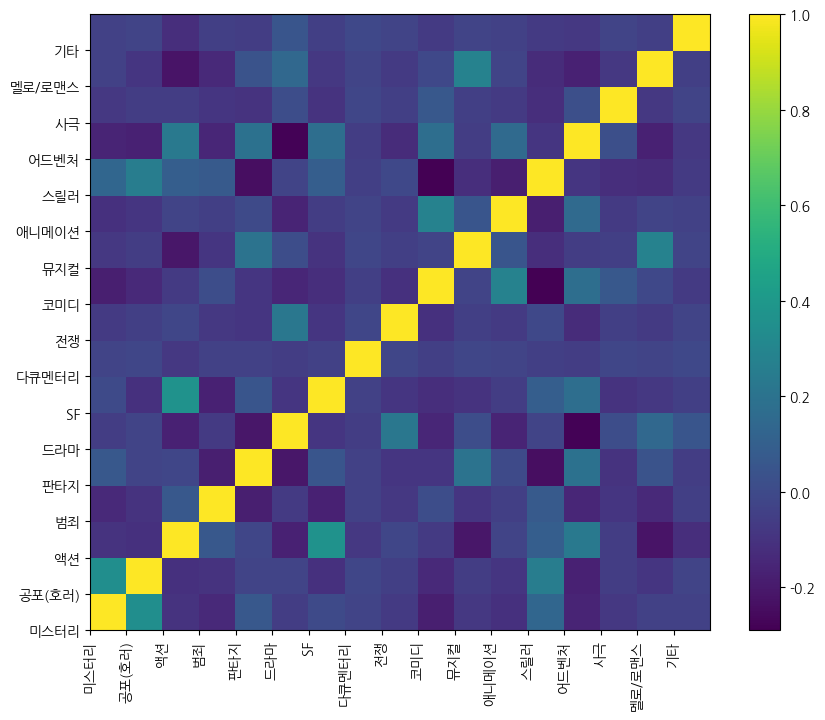

In [23]:
plt.pcolor(corr_genre)
plt.xticks(range(len(corr_genre.columns)),corr_genre.columns, rotation=90)
plt.yticks(range(len(corr_genre.columns)),corr_genre.columns)
plt.colorbar()
plt.show()

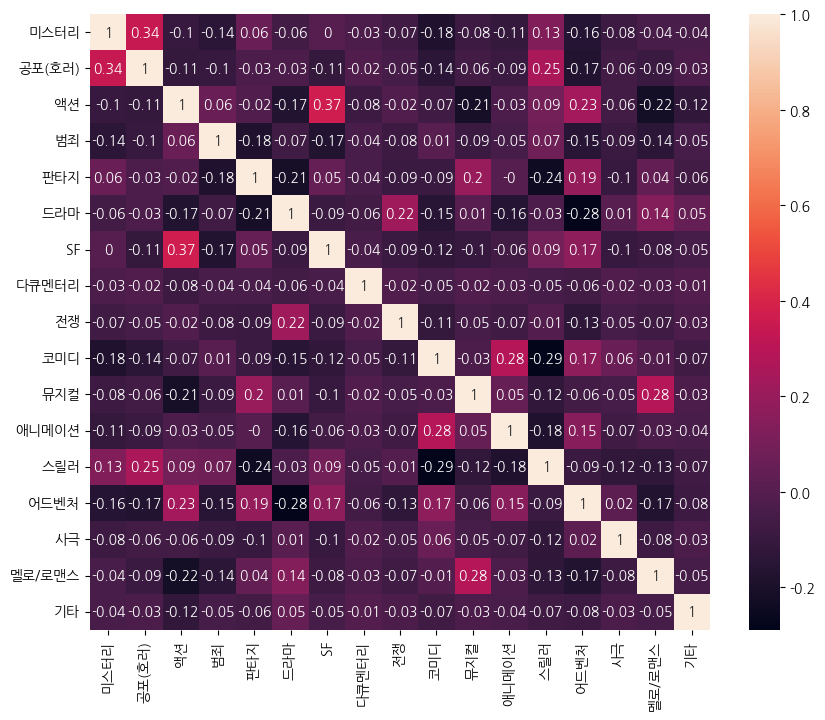

In [24]:
ax = sns.heatmap(corr_genre, annot=True, )
plt.show()

In [93]:
cur.execute("select * from movie")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
movie = pd.DataFrame(result, columns=columns)

In [94]:
genre_serise = movie["genre"]
genre_serise.tolist()

["['사극', '액션']",
 "['애니메이션', '어드벤처', '코미디', '뮤지컬', ",
 "['SF']",
 "['어드벤처']",
 "['드라마']",
 "['드라마']",
 "['드라마']",
 "['액션', 'SF', '어드벤처']",
 "['사극', '액션']",
 "['액션', 'SF']",
 "['액션', '판타지', 'SF', '어드벤처']",
 "['액션', '판타지']",
 "['드라마']",
 "['액션', '드라마', 'SF', '스릴러']",
 "['액션', '어드벤처', 'SF']",
 "['사극']",
 "['다큐멘터리']",
 "['범죄', '액션']",
 "['액션', '스릴러', '범죄']",
 "['멜로/로맨스']",
 "['애니메이션', '액션', '어드벤처']",
 "['액션', '드라마']",
 "['액션', '미스터리', 'SF', '스릴러']",
 "['어드벤처', '판타지']",
 "['멜로/로맨스', '코미디']",
 "['액션']",
 "['액션', '스릴러']",
 "['어드벤처', '드라마', '판타지']",
 "['멜로/로맨스', '드라마']",
 "['액션']",
 "['액션', '스릴러']",
 "['범죄', '액션']",
 "['스릴러']",
 "['드라마']",
 "['코미디', '멜로/로맨스', '드라마']",
 "['드라마']",
 "['드라마']",
 "['액션', '드라마', '전쟁']",
 "['드라마']",
 "['드라마']",
 "['멜로/로맨스', '드라마']",
 "['액션', '어드벤처', '드라마']",
 "['액션', '어드벤처', '드라마']",
 "['액션', '드라마', '전쟁']",
 "['판타지', '액션']",
 "['액션', '어드벤처', 'SF']",
 "['범죄', '드라마']",
 "['액션']",
 "['드라마', '코미디']",
 "['범죄', '스릴러']",
 "['액션', '드라마']",
 "['액션', '드라마']",
 "['액션', '어드벤처',

In [98]:
# new_genres = []

# for genres in genre_serise:
#     genres = re.split("\[\'", genres)[1]
#     genres = re.split("\'\]", genres)[0]
#     genres = re.split("'", genres)[0]
#     genres = re.split(', ', genres)[0]
#     new_genres.append(genres)
# new_genres, len(new_genres)

(['사극',
  '애니메이션',
  'SF',
  '어드벤처',
  '드라마',
  '드라마',
  '드라마',
  '액션',
  '사극',
  '액션',
  '액션',
  '액션',
  '드라마',
  '액션',
  '액션',
  '사극',
  '다큐멘터리',
  '범죄',
  '액션',
  '멜로/로맨스',
  '애니메이션',
  '액션',
  '액션',
  '어드벤처',
  '멜로/로맨스',
  '액션',
  '액션',
  '어드벤처',
  '멜로/로맨스',
  '액션',
  '액션',
  '범죄',
  '스릴러',
  '드라마',
  '코미디',
  '드라마',
  '드라마',
  '액션',
  '드라마',
  '드라마',
  '멜로/로맨스',
  '액션',
  '액션',
  '액션',
  '판타지',
  '액션',
  '범죄',
  '액션',
  '드라마',
  '범죄',
  '액션',
  '액션',
  '액션',
  '드라마',
  '범죄',
  '사극',
  '액션',
  '액션',
  '드라마',
  '액션',
  '미스터리',
  '드라마',
  '애니메이션',
  '액션',
  '사극',
  '액션',
  '코미디',
  '액션',
  '액션',
  '코미디',
  '드라마',
  '액션',
  '액션',
  '애니메이션',
  '액션',
  '코미디',
  '애니메이션',
  '액션',
  '스릴러',
  '액션',
  '판타지',
  '멜로/로맨스',
  '액션',
  '액션',
  '드라마',
  '액션',
  '멜로/로맨스',
  '스릴러',
  '드라마',
  '사극',
  '애니메이션',
  '범죄',
  '멜로/로맨스',
  '범죄',
  '사극',
  '어드벤처',
  '스릴러',
  '코미디',
  '애니메이션',
  '드라마',
  '액션',
  '범죄',
  '액션',
  '액션',
  '드라마',
  '전쟁',
  '코미디',
  '미스터리',
  '사극',
  '액션',
  '액션',
  '애니메이션',
  '어드벤처

In [99]:
movie["genre"] = new_genres
movie.head()

,id,name,year,sale,audience,screen,screen_number,genre
0,1,명량,2014,2147483647,17613682,1587,188611,사극
1,2,겨울왕국,2014,2147483647,10296101,1010,157683,애니메이션
2,3,인터스텔라,2014,2147483647,10105247,1410,166218,SF
3,4,해적: 바다로 간 산적,2014,2147483647,8666046,910,133350,어드벤처
4,5,수상한 그녀,2014,2147483647,8657982,1027,136975,드라마


In [63]:
# new_genres = []
# for genres in genre_serise:
#     newGenre = []
#     if any(g in genres for g in ["애니메이션", "코미디"]):
#         newGenre.append("애니메이션&코미디")
#     if any(g in genres for g in ["멜로/로맨스", "뮤지컬"]):
#         newGenre.append("멜로/로맨스&뮤지컬")
#     if any(g in genres for g in ["드라마", "전쟁"]):
#         newGenre.append("드라마&전쟁")
#     if any(g in genres for g in ["미스터리", "공포(호러)"]):
#         newGenre.append("미스터리&공포(호러)")
#     if any(g in genres for g in ["SF", "액션"]):
#         newGenre.append("SF&액션")
#     if any(g in genres for g in ["어드벤처", "판타지"]):
#         newGenre.append("어드벤처&판타지")
#     if not newGenre:
#         # Safely extract text inside square brackets if they exist
#         match = re.search(r"\[\'(.*?)\'\]", genres)
#         if match:
#             extracted_genres = match.group(1)  # Extract content inside brackets
#             split_genres = extracted_genres.split(', ')  # Split by ', '
#             newGenre.extend(split_genres)  # Add to newGenre
#         else:
#             # If no brackets, treat the entire string as a single genre
#             newGenre.append(genres.strip())
    
#     new_genres.append(newGenre)
# new_genres, len(new_genres)

([['SF&액션'],
  ['애니메이션&코미디', '멜로/로맨스&뮤지컬', '어드벤처&판타지'],
  ['SF&액션'],
  ['어드벤처&판타지'],
  ['드라마&전쟁'],
  ['드라마&전쟁'],
  ['드라마&전쟁'],
  ['SF&액션', '어드벤처&판타지'],
  ['SF&액션'],
  ['SF&액션'],
  ['SF&액션', '어드벤처&판타지'],
  ['SF&액션', '어드벤처&판타지'],
  ['드라마&전쟁'],
  ['드라마&전쟁', 'SF&액션'],
  ['SF&액션', '어드벤처&판타지'],
  ['사극'],
  ['다큐멘터리'],
  ['SF&액션'],
  ['SF&액션'],
  ['멜로/로맨스&뮤지컬'],
  ['애니메이션&코미디', 'SF&액션', '어드벤처&판타지'],
  ['드라마&전쟁', 'SF&액션'],
  ['미스터리&공포(호러)', 'SF&액션'],
  ['어드벤처&판타지'],
  ['애니메이션&코미디', '멜로/로맨스&뮤지컬'],
  ['SF&액션'],
  ['SF&액션'],
  ['드라마&전쟁', '어드벤처&판타지'],
  ['멜로/로맨스&뮤지컬', '드라마&전쟁'],
  ['SF&액션'],
  ['SF&액션'],
  ['SF&액션'],
  ['스릴러'],
  ['드라마&전쟁'],
  ['애니메이션&코미디', '멜로/로맨스&뮤지컬', '드라마&전쟁'],
  ['드라마&전쟁'],
  ['드라마&전쟁'],
  ['드라마&전쟁', 'SF&액션'],
  ['드라마&전쟁'],
  ['드라마&전쟁'],
  ['멜로/로맨스&뮤지컬', '드라마&전쟁'],
  ['드라마&전쟁', 'SF&액션', '어드벤처&판타지'],
  ['드라마&전쟁', 'SF&액션', '어드벤처&판타지'],
  ['드라마&전쟁', 'SF&액션'],
  ['SF&액션', '어드벤처&판타지'],
  ['SF&액션', '어드벤처&판타지'],
  ['드라마&전쟁'],
  ['SF&액션'],
  ['애니메이션&코미디', '드라마&전쟁'],
  ["범죄'", "'스릴러"],

In [148]:
movie = pd.read_csv('/home/lim/dev_ws/eda/ros_eda_project/data/movie_chart.csv')
movie.head()

,rank,name,year,sale,audience,screen,screen_number,genre
0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']"
1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF']
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처']
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마']


In [149]:
options = webdriver.ChromeOptions()

prefs = {"download.default_directory" : "/home/lim/dev_ws/eda/data", "download.prompt_for_download":False}
options.add_experimental_option("prefs", prefs)

url = "https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do"
driver = webdriver.Chrome(service=Service("/home/lim/dev_ws/eda/driver/chromedriver"), options=options)

driver.get(url)
driver.set_window_size(1800, 1300)

In [150]:
year = driver.find_element(By.ID, "sSearchYearFrom")
years = []
years_list = year.find_elements(By.TAG_NAME, "option")
for yearly in years_list:
    yearly = yearly.get_attribute("value")
    years.append(yearly)
years = years[10:-2]
years

['2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [151]:
movie_months = []
box_office_year = []
for yearly in years:
    year = driver.find_element(By.ID, "sSearchYearFrom")
    year.send_keys(yearly)
    link = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, "btn_blue")))
    link.click()
    
    page = driver.page_source
    soup = BeautifulSoup(page, "html.parser")
    movies = soup.find("table", "tbl_comm th_sort")
    movie_list = movies.find("tbody")
    rows =  movie_list.find_all("tr")
    for row in rows:
        openMonth = row.find("td", id="td_openDt")

        if openMonth:
            openMonth = openMonth.get_text(strip=True)  # Get the text and remove extra whitespace
            openMonth = re.split(r'\-', openMonth)[1]  # Extract the month part from the date (e.g., '2024-02-22' -> '02')
            movie_months.append(openMonth)
            box_office_year.append(yearly)

movie_months, len(movie_months)

(['07',
  '01',
  '11',
  '08',
  '01',
  '12',
  '12',
  '06',
  '07',
  '06',
  '05',
  '04',
  '09',
  '07',
  '03',
  '04',
  '11',
  '07',
  '05',
  '08',
  '07',
  '04',
  '09',
  '12',
  '10',
  '02',
  '08',
  '03',
  '01',
  '09',
  '12',
  '12',
  '10',
  '10',
  '01',
  '09',
  '03',
  '03',
  '12',
  '08',
  '05',
  '05',
  '02',
  '11',
  '10',
  '07',
  '02',
  '11',
  '10',
  '04',
  '08',
  '07',
  '04',
  '12',
  '11',
  '09',
  '02',
  '07',
  '06',
  '06',
  '11',
  '12',
  '07',
  '10',
  '02',
  '05',
  '09',
  '04',
  '07',
  '03',
  '06',
  '09',
  '12',
  '01',
  '09',
  '09',
  '07',
  '05',
  '05',
  '01',
  '08',
  '01',
  '01',
  '11',
  '02',
  '06',
  '02',
  '10',
  '03',
  '12',
  '12',
  '04',
  '04',
  '10',
  '05',
  '01',
  '10',
  '08',
  '12',
  '01',
  '07',
  '02',
  '04',
  '09',
  '08',
  '07',
  '10',
  '05',
  '08',
  '10',
  '12',
  '02',
  '11',
  '12',
  '06',
  '01',
  '02',
  '02',
  '07',
  '11',
  '05',
  '09',
  '12',
  '07',
  '07',


In [154]:
movieID = []

for idx in range(len(movie)):
    movieID.append(idx)
movie["id"] = movieID

In [155]:
movie["month"] = movie_months
movie["box_office_year"] = box_office_year
movie.head()

,rank,name,year,sale,audience,screen,screen_number,genre,id,month,box_office_year
0,1,명량,2014,135748398910,17613682,1587,188611,"['사극', '액션']",0,07,2014
1,2,겨울왕국,2014,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']",1,01,2014
2,3,인터스텔라,2014,80671424300,10105247,1410,166218,['SF'],2,11,2014
3,4,해적: 바다로 간 산적,2014,66370682706,8666046,910,133350,['어드벤처'],3,08,2014
4,5,수상한 그녀,2014,62705348249,8657982,1027,136975,['드라마'],4,01,2014


In [156]:
movie.tail()

,rank,name,year,sale,audience,screen,screen_number,genre,id,month,box_office_year
495,46,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2022,5198084474,514915,402,27669,['멜로/로맨스'],495,11,2023
496,47,3일의 휴가,2023,4835070689,514541,863,31547,"['판타지', '드라마']",496,12,2023
497,48,소년들,2023,4470423586,471425,1042,43356,"['드라마', '범죄']",497,11,2023
498,49,타이타닉,2023,6528961730,454336,447,14296,"['드라마', '멜로/로맨스', '액션']",498,02,2023
499,50,타겟,2023,4003424694,424916,986,43332,['스릴러'],499,08,2023


In [158]:
movie = movie[["id", "name", "year", "box_office_year", "month", "sale", "audience", "screen", "screen_number", "genre"]]
movie.head()

,id,name,year,box_office_year,month,sale,audience,screen,screen_number,genre
0,0,명량,2014,2014,07,135748398910,17613682,1587,188611,"['사극', '액션']"
1,1,겨울왕국,2014,2014,01,82461504400,10296101,1010,157683,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']"
2,2,인터스텔라,2014,2014,11,80671424300,10105247,1410,166218,['SF']
3,3,해적: 바다로 간 산적,2014,2014,08,66370682706,8666046,910,133350,['어드벤처']
4,4,수상한 그녀,2014,2014,01,62705348249,8657982,1027,136975,['드라마']


In [165]:
# aws key pw -> aws connect

In [160]:
cur.execute("DROP TABLE movie")
cur.execute("CREATE TABLE movie (id int, name varchar(16), year int, box_office_year int, month int, sale int, audience int, screen int, screen_number int, genre varchar(32))")

In [161]:
cur = remote.cursor(buffered=True)
sql = "INSERT INTO movie VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
for i, row in movie.iterrows():
    cur.execute(sql, tuple(row))
    print(tuple(row))
    remote.commit()

(0, '명량', 2014, '2014', '07', 135748398910, 17613682, 1587, 188611, "['사극', '액션']")
(1, '겨울왕국', 2014, '2014', '01', 82461504400, 10296101, 1010, 157683, "['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']")
(2, '인터스텔라', 2014, '2014', '11', 80671424300, 10105247, 1410, 166218, "['SF']")
(3, '해적: 바다로 간 산적', 2014, '2014', '08', 66370682706, 8666046, 910, 133350, "['어드벤처']")
(4, '수상한 그녀', 2014, '2014', '01', 62705348249, 8657982, 1027, 136975, "['드라마']")
(5, '변호인', 2013, '2014', '12', 41918383800, 5687571, 925, 97261, "['드라마']")
(6, '국제시장', 2014, '2014', '12', 41089567596, 5345677, 966, 63603, "['드라마']")
(7, '트랜스포머: 사라진 시대', 2014, '2014', '06', 44012752845, 5295836, 1602, 107875, "['액션', 'SF', '어드벤처']")
(8, '군도: 민란의 시대', 2014, '2014', '07', 36988022499, 4774931, 1394, 67237, "['사극', '액션']")
(9, '엣지 오브 투모로우', 2014, '2014', '06', 38732961201, 4699307, 801, 94559, "['액션', 'SF']")
(10, '엑스맨: 데이즈 오브 퓨처 패스트', 2014, '2014', '05', 34654558766, 4313871, 1056, 82722, "['액션', '판타지', 'SF', '어드벤처']")
(11, '어메이징 스파

In [162]:
cur.close()

True

In [163]:
remote.close()